In [45]:
import pandas as pd
import seaborn as sns
import re
from gensim.models import Word2Vec
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [4]:
recipe_df = pd.read_csv("C:/Users/Olive/OneDrive/Desktop/github/FoodRecipeNLP/data/all_recipes.csv")
recipe_df.head()

,Name,Ingredients,Cuisine
0,Fish Tacos - Baja Style,"all-purpose flour,baking powder,beer,cayenne,c...",mexican
1,Margarita,"lemon juice,lime juice,tequila,triple sec",mexican
2,Menudo Rojo (Red Menudo),"chili peppers,corn tortillas,crushed red peppe...",mexican
3,Birria,"bay leaves,beef,black peppercorns,cider vinega...",mexican
4,Machaca Burritos,"butter,eggs,grape tomatoes,meat,mozzarella che...",mexican


In [5]:
# No missing values found
recipe_df.isnull().any()

Name           False
Ingredients    False
Cuisine        False
dtype: bool

## Data Exploration

<AxesSubplot:title={'center':'Histogram of the Number of Ingredients Across All Recipes'}, xlabel='Ingredients', ylabel='Count'>

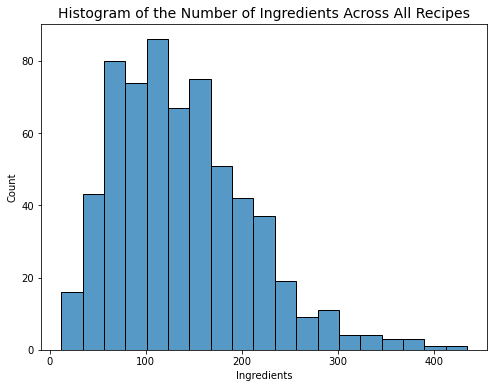

In [6]:
# Reference: https://www.kaggle.com/code/fritzpassow/recipe-ingredients-analysis
num_ingredients = recipe_df.Ingredients.map(lambda x:len(x))

plt.figure(figsize = (8,6))
plt.title("Histogram of the Number of Ingredients Across All Recipes", fontsize = 14)
sns.histplot(num_ingredients)

<AxesSubplot:title={'center':'Number of Recipe for Each Cuisine'}, xlabel='Cuisine'>

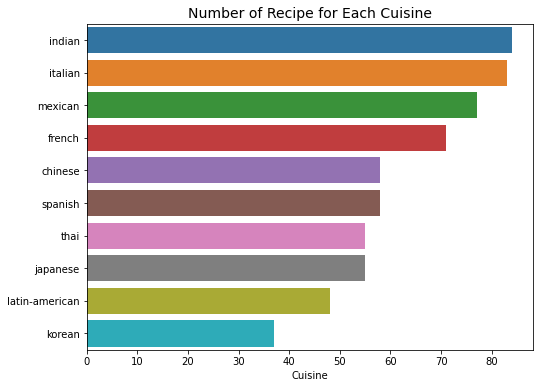

In [7]:
cusine_counts = recipe_df.Cuisine.value_counts()
plt.figure(figsize = (8,6))
plt.title("Number of Recipe for Each Cuisine", fontsize = 14)
sns.barplot(x = cusine_counts, y = cusine_counts.index)

## Data cleaning

In [8]:
# Reference: https://builtin.com/machine-learning/nlp-word2vec-python
def clean_text(df, col_name):
    '''
    Given a column of data, remove unwanted special characters from the text
    '''
    clean_txt = []
    for w in range(len(df[col_name])):
        desc = df[col_name][w].lower()

        # remove punctuation
        desc = re.sub('[^a-zA-Z]', ' ', desc)

        #remove tags
        desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)

        # remove digits and special chars
        desc=re.sub("(\\d|\\W)+"," ",desc)
        clean_txt.append(desc)

    df['Cleaned_'+ col_name] = clean_txt
    return df

In [15]:
def clean_ing(df, col_name):
    '''
    Given an ingredient list, ensure multi-word ingredients are read as one
    '''
    clean_ing = []
    for w in range(len(df[col_name])):
        ing = df[col_name][w]
        
        #add hyphen
        ing = re.sub(' ', '-', ing)
        
        clean_ing.append(ing)
    df['Cleaned_' + col_name] = clean_ing
    return df

In [16]:
recipe_df = clean_text(recipe_df, 'Name')
recipe_df = clean_ing(recipe_df, 'Ingredients')

In [20]:
recipe_df.head()

,Name,Ingredients,Cuisine,Cleaned_Name,Cleaned_Ingredients
0,Fish Tacos - Baja Style,"all-purpose flour,baking powder,beer,cayenne,c...",mexican,fish tacos baja style,"all-purpose-flour,baking-powder,beer,cayenne,c..."
1,Margarita,"lemon juice,lime juice,tequila,triple sec",mexican,margarita,"lemon-juice,lime-juice,tequila,triple-sec"
2,Menudo Rojo (Red Menudo),"chili peppers,corn tortillas,crushed red peppe...",mexican,menudo rojo red menudo,"chili-peppers,corn-tortillas,crushed-red-peppe..."
3,Birria,"bay leaves,beef,black peppercorns,cider vinega...",mexican,birria,"bay-leaves,beef,black-peppercorns,cider-vinega..."
4,Machaca Burritos,"butter,eggs,grape tomatoes,meat,mozzarella che...",mexican,machaca burritos,"butter,eggs,grape-tomatoes,meat,mozzarella-che..."


In [13]:
corpus = []
for col in recipe_df['Cleaned_Name']:
    word_list = col.split(' ')
    corpus.append(word_list)
corpus

[['fish', 'tacos', 'baja', 'style'],
 ['margarita'],
 ['menudo', 'rojo', 'red', 'menudo', ''],
 ['birria'],
 ['machaca', 'burritos'],
 ['chilaquiles', 'with', 'chicken'],
 ['nopal', 'breakfast'],
 ['watermelon', 'agua', 'fresca'],
 ['enfrijoladas'],
 ['morisqueta', 'con', 'chorizo'],
 ['memelas'],
 ['pork', 'carnitas'],
 ['mexican',
  'style',
  'meat',
  'and',
  'vegetable',
  'stew',
  'azteca',
  's',
  'molcajete'],
 ['el', 'rey', 's', 'fish', 'tacos'],
 ['capirotada'],
 ['mole', 'coloradito', 'enchiladas', 'from', 'rick', 'bayless'],
 ['cuernitos', 'menonitas', 'mennonite', 'little', 'horns', ''],
 ['cabrito', 'goat', 'and', 'red', 'gravy'],
 ['guava', 'cheese', 'flan'],
 ['michelada', 'authentic'],
 ['chicken', 'pozole'],
 ['aguachiles'],
 ['churros', 'from', 'casa', 'marcela'],
 ['mexican', 'elote'],
 ['nopalitos', 'con', 'huevos', 'breakfast', 'tacos'],
 ['best', 'albondigas', 'soup'],
 ['horchata'],
 ['restaurant', 'guacamole'],
 ['sopa', 'de', 'lima', 'merida', 'yucatan', ''

In [61]:
ingcorpus = []
indianfood = recipe_df[recipe_df['Cuisine']=='indian']
for col in recipe_df['Cleaned_Ingredients']:
        word_list = col.split(',')
        ingcorpus.append(word_list)
ingcorpus

[['all-purpose-flour',
  'baking-powder',
  'beer',
  'cayenne',
  'cilantro',
  'cilantro-leaves',
  'corn-tortillas',
  'dry-mustard',
  'fish',
  'fresh-ground-black-pepper',
  'garlic',
  'garlic-powder',
  'green-cabbage',
  'guacamole',
  'kosher-salt',
  'lime-juice',
  'lime-wedges',
  'low-fat-yogurt',
  'mayonnaise',
  'Mexican-oregano',
  'pico-de-gallo',
  'salsa',
  'vegetable-oil',
  'white-onions'],
 ['lemon-juice', 'lime-juice', 'tequila', 'triple-sec'],
 ['chili-peppers',
  'corn-tortillas',
  'crushed-red-pepper-flakes',
  'dried-oregano',
  'flour-tortillas',
  'fresh-cilantro',
  'garlic-cloves',
  'green-onions',
  'ground-black-pepper',
  'ground-red-pepper',
  'hominy',
  'lemon-wedges',
  'lime-wedges',
  'salt',
  'tripe',
  'water',
  'white-onions'],
 ['bay-leaves',
  'beef',
  'black-peppercorns',
  'cider-vinegar',
  'corn-tortillas',
  'diced-tomatoes',
  'dried-guajillo-chilies',
  'dried-Mexican-oregano',
  'dried-oregano',
  'garlic-cloves',
  'goat-mea

In [78]:
model = Word2Vec(ingcorpus, min_count = 1, vector_size = 50, window = 5, sg = 1)

In [28]:
model.wv['all-purpose-flour',
  'baking-powder',
  'beer',
  'cayenne',
  'cilantro',
  'cilantro-leaves',
  'corn-tortillas',
  'dry-mustard',
  'fish',
  'fresh-ground-black-pepper',
  'garlic',
  'garlic-powder',
  'green-cabbage',
  'guacamole',
  'kosher-salt',
  'lime-juice',
  'lime-wedges',
  'low-fat-yogurt',
  'mayonnaise',
  'Mexican-oregano',
  'pico-de-gallo',
  'salsa',
  'vegetable-oil',
  'white-onions']

array([[ 1.3744591 ],
       [ 1.325339  ],
       [ 0.33832076],
       [ 0.20987009],
       [ 1.6319841 ],
       [ 1.21053   ],
       [ 0.9139038 ],
       [ 1.0622115 ],
       [ 0.623034  ],
       [ 1.5626087 ],
       [ 1.901033  ],
       [ 1.5668311 ],
       [ 1.2680237 ],
       [ 1.0713086 ],
       [ 1.6512098 ],
       [ 2.0654917 ],
       [ 1.3024652 ],
       [ 0.2130889 ],
       [ 1.2437184 ],
       [-0.07664624],
       [ 0.44611743],
       [ 0.21902674],
       [ 1.8014151 ],
       [ 1.0702026 ]], dtype=float32)

In [79]:
ingredients = list(model.wv.key_to_index)

C:\Users\Olive\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Olive\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


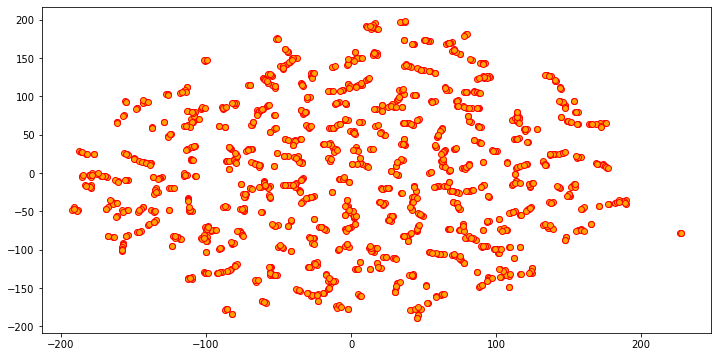

In [65]:
from sklearn.manifold import TSNE

words = model.wv.index_to_key
wvs = model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
#for label, x, y in zip(labels, T[:, 0], T[:, 1]):
#    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [72]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector

In [73]:
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus=ingcorpus, model=model,
                                             num_features=5)
pd.DataFrame(w2v_feature_array)

,0,1,2,3,4
0,0.153486,0.417166,0.837782,-0.532531,0.010836
1,0.065480,0.328306,0.676604,-0.512351,0.010332
2,0.077585,0.453021,0.825854,-0.567876,-0.029615
3,0.103489,0.431051,0.935422,-0.612284,-0.023999
4,0.181964,0.333165,0.878682,-0.511582,0.028335
...,...,...,...,...,...
621,0.197523,0.109375,0.288760,-0.258837,-0.120111
622,0.084636,0.411303,0.936002,-0.501754,0.042472
623,0.095626,0.454984,0.943343,-0.591593,-0.050902
624,0.062154,0.533627,1.089663,-0.705014,-0.087132


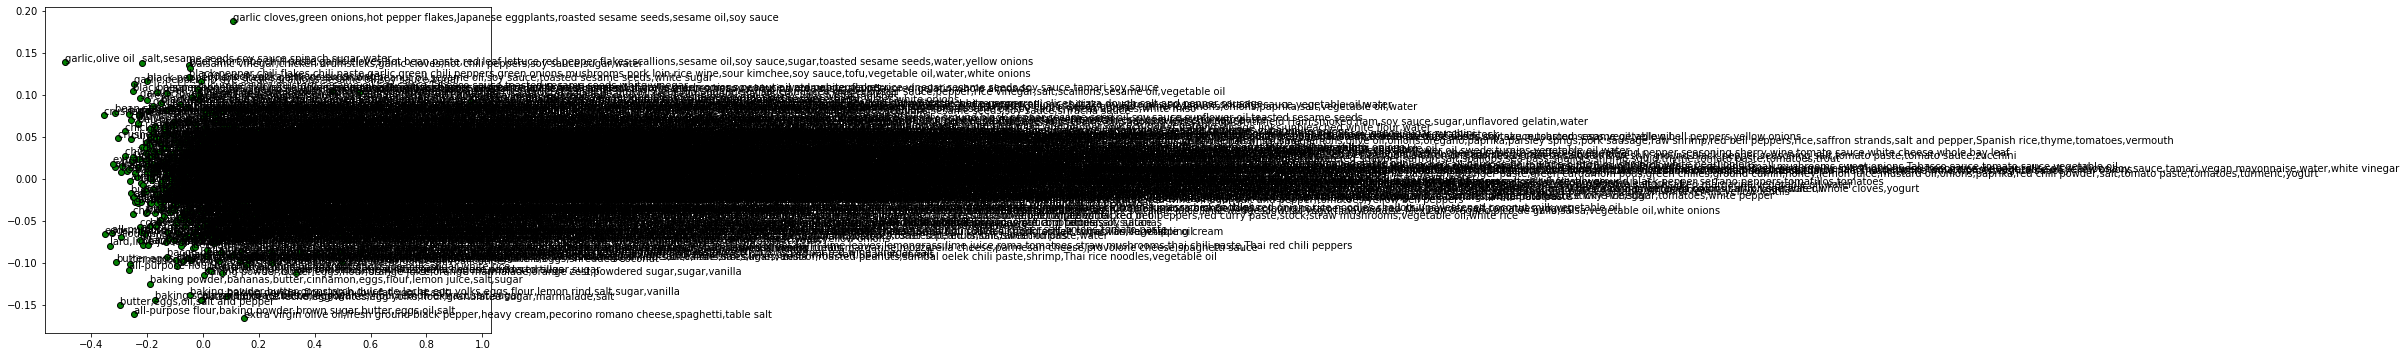

In [77]:
pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(w2v_feature_array)
labels = recipe_df['Cuisine']
categories = list(recipe_df['Ingredients'])
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-4, y+1e-3), xytext=(0, 0), textcoords='offset points')